In [245]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import periodicLT_2d as LT
import computeL1 as LT1

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_info(kappa, geometry, filename = None):
    if filename==None:
        filename = "Data/saved/{}_kappa_{:7d}_local.npy".format(geometry, int(1e6*kappa))
    tempData = load(filename).item()
    
    Nb = tempData['Nb']
    Nq = tempData['Nq']
    kappakappa = tempData['kappakappa']
    II = tempData['II']
    final_data = tempData['final_data']

    Nkappa, Nintegral = len( kappakappa ), len( II )
    kk, ii = np.meshgrid(kappakappa, II)
    kk, ii = list( np.reshape(kk, Nkappa*Nintegral ) ), list( np.reshape(ii, Nkappa*Nintegral ) ) # as list
    args = [(kk[i], ii[i]) for i in range(len(kk))]

    Larray = zeros((Nkappa, Nintegral))
    Varray = zeros((Nkappa, Nintegral, Nb, Nb))
    for ik in range( Nkappa ):
        for iI in range( Nintegral ):
            Larray[ik, iI] = final_data[Nkappa*iI + ik][0]
            Varray[ik, iI, :, :] = final_data[Nkappa*iI + ik][1]
    tempData["Larray"] = Larray
    tempData["Varray"] = Varray
    return tempData

First picture, for kappa 1.1654

In [3]:
kappa = 1.1654

Tdata = get_info(kappa, "Triangular")
Sdata = get_info(kappa, "Square")
Hdata = get_info(kappa, "Hexagonal")


Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)

In [4]:
len(Tdata['II'])

61

gamma =  1.1654


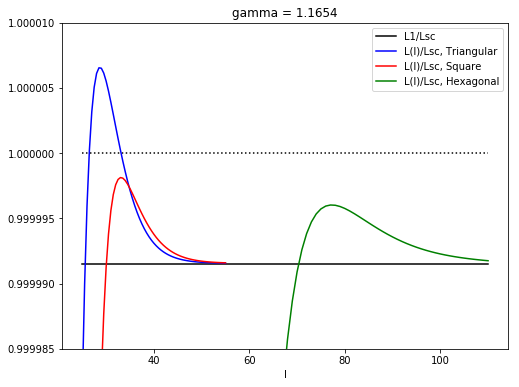

In [5]:
###########################
# Plot
##########################

figsize(8, 6)

print("gamma = ", kappa)

_ = title("gamma = {}".format(kappa))
plot([25, 110], array([1, 1]), ':k' )
plot([25, 110], L1/Lsc*array([1, 1]), 'k', label="L1/Lsc")


plot(Tdata['II'], Tdata['Larray'][0,:]/Lsc, 'b', label="L(I)/Lsc, Triangular")
plot(Sdata['II'], Sdata['Larray'][0,:]/Lsc, 'r', label="L(I)/Lsc, Square")
plot(Hdata['II'], Hdata['Larray'][0,:]/Lsc, 'g', label="L(I)/Lsc, Hexagonal")

ylim(0.999985, 1.00001)
_ = legend()
_ = xlabel("I")

ticks = list( linspace(0.999985, 1.000010, 6))
_ = yticks(ticks, ["{:7f}".format(f) for f in ticks])

savefig("Images/2d_gamma11654.pdf")

In [6]:
kappa = 1.1653

Tdata = get_info(kappa, "Triangular")
Sdata = get_info(kappa, "Square")
Hdata = get_info(kappa, "Hexagonal")


Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)


gamma =  1.1653


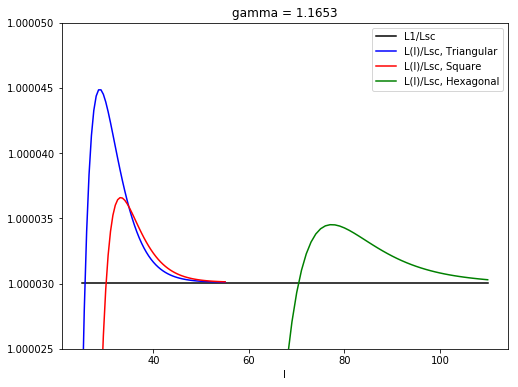

In [7]:
###########################
# Plot
##########################
shift = 0.00004

figsize(8, 6)

print("gamma = ", kappa)

_ = title("gamma = {}".format(kappa))
#plot([25, 110], array([1, 1]), ':k' )
plot([25, 110], L1/Lsc*array([1, 1]), 'k', label="L1/Lsc")


plot(Tdata['II'], Tdata['Larray'][0,:]/Lsc, 'b', label="L(I)/Lsc, Triangular")
plot(Sdata['II'], Sdata['Larray'][0,:]/Lsc, 'r', label="L(I)/Lsc, Square")
plot(Hdata['II'], Hdata['Larray'][0,:]/Lsc, 'g', label="L(I)/Lsc, Hexagonal")

ylim(1.000025, 1.00005)
_ = legend()
_ = xlabel("I")

ticks = list( linspace(0.999985, 1.000010, 6) + shift)
_ = yticks(ticks, ["{:7f}".format(f) for f in ticks])

savefig("Images/2d_gamma11653.pdf")

### Picture for the critical kappa

In [8]:
kappa = 1.165417

Tdata = get_info(kappa, "Triangular")
Sdata = get_info(kappa, "Square")
Hdata = get_info(kappa, "Hexagonal")

Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)

gamma =  1.165417


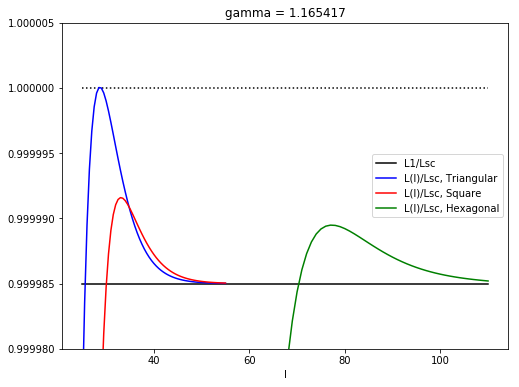

In [9]:
###########################
# Plot
##########################
shift = 0.00004

figsize(8, 6)

print("gamma = ", kappa)

_ = title("gamma = {}".format(kappa))
plot([25, 110], array([1, 1]), ':k' )
plot([25, 110], L1/Lsc*array([1, 1]), 'k', label="L1/Lsc")


plot(Tdata['II'], Tdata['Larray'][0,:]/Lsc, 'b', label="L(I)/Lsc, Triangular")
plot(Sdata['II'], Sdata['Larray'][0,:]/Lsc, 'r', label="L(I)/Lsc, Square")
plot(Hdata['II'], Hdata['Larray'][0,:]/Lsc, 'g', label="L(I)/Lsc, Hexagonal")

ylim(0.999980, 1.000005)
_ = legend()
_ = xlabel("I")

ticks = list( linspace(0.999980, 1.000005, 6) )
_ = yticks(ticks, ["{:7f}".format(f) for f in ticks])

savefig("Images/2d_gamma1165417.pdf")

## Plot the optimal potentials

### Triangular

In [10]:
kappa = 1.1654

Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)

Triangular lattice, Maximum obtained for I = 28.5


ValueError: could not broadcast input array from shape (20,20) into shape (60,60)

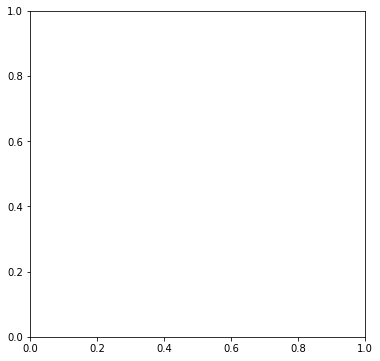

In [24]:

iTmax = argmax(Tdata['Larray']/Lsc)
print("Triangular lattice, Maximum obtained for I = {}".format(Tdata['II'][iTmax]))

WS = LT.WS(40, type="Triangular")
VT = Tdata['Varray'][0, iTmax]

################################
# Plot
################################

figsize(6, 6)
fig = plt.figure(1)
ax = fig.add_subplot(111)


pcm = WS.zoom_plot(-VT, ax = ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

axis('off')
axis('equal')

xlim(0.7, 4.2)
colorbar(pcm, orientation='horizontal', shrink=0.75)

#savefig("Images/TriangularLattice.eps", bbox_inches = "tight")

In [25]:
shape(VT)

(40, 40)

### Square

In [145]:
kappa = 1.1654

Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)

In [47]:

iSmax = argmax(Sdata['Larray']/Lsc)
print("Square lattice, Maximum obtained for I = {}".format(Sdata['II'][iSmax]))

WS = LT.WS(40, type="Square")
VS = Sdata['Varray'][0, iTmax]

################################
# Plot
################################
figsize(6, 6)

fig = plt.figure(1)
ax = fig.add_subplot(111)


pcm = WS.plot(-VS)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

axis('off')
axis('equal')

colorbar(pcm, orientation='horizontal', shrink=0.75)

savefig("Images/SquareLattice.eps", bbox_inches = "tight")

Square lattice, Maximum obtained for I = 33.0


### Hexagonal lattice

In [ ]:
kappa = 1.1654

Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)

In [48]:
iHmax = argmax(Hdata['Larray']/Lsc)
print("Hexagonal lattice, Maximum obtained for I = {}".format(Hdata['II'][iHmax]))

WS = LT.WS(40, type="Hexagonal")
VH = Hdata['Varray'][0, iTmax]

################################
# Plot
################################

figsize(6,6)
fig = plt.figure(1)
ax = fig.add_subplot(111)


pcm = WS.plot(-VH)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

axis('off')
axis('equal')

xlim(0.7, 4.2)
colorbar(pcm, orientation='horizontal', shrink=0.75)

savefig("Images/HexagonalLattice.eps",  bbox_inches = "tight")

Hexagonal lattice, Maximum obtained for I = 77.0


In [160]:
amax(-VT)

119.20731184645213

# Previous

In [279]:
filename = "Data/out_09-26_14H46_Hexagonal_kappa_1165389_local.npy"
#filename = "Data/out_09-25_11H48_Triangular_kappa_1165410_local.npy"
Data = get_info(kappa, geometry, filename)

kappa = Data['kappakappa'][0]
geometry = Data['geometry']

Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)

gamma =  1.1653897
Maximum attained at 77.26666666666667


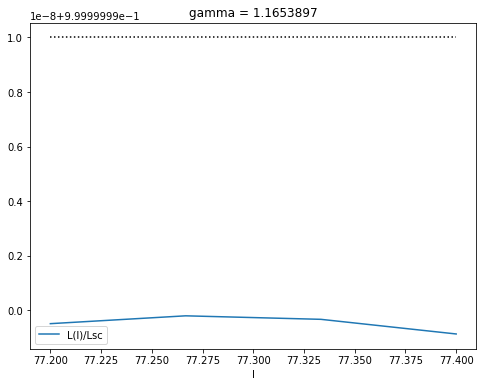

In [280]:
figsize(8, 6)

print("gamma = ", kappa)

_ = title("gamma = {}".format(kappa))
plot(Data['II'], Data['Larray'][0,:]/Lsc, label="L(I)/Lsc")
plot([Data['II'][0], Data['II'][-1]], array([1, 1]), ':k')

_ = legend()
_ = xlabel("I")

#ticks = list( linspace(0.999995, 1.000001, 8))
#_ = yticks(ticks, ["{:7f}".format(f) for f in ticks])

print("Maximum attained at {}".format(Data['II'][argmax(Data['Larray'][0,:]/Lsc)]))


In [281]:
Data['II'][argmax(Data['Larray'][0,:]/Lsc)]

77.26666666666667

In [8]:
kappa = 1.16537787
Lsc = LT.Lsc(kappa)
L1 = LT1.L1(kappa)
print("L1/Lsc = {}".format(L1/Lsc))

L1/Lsc = 1.0000000102753581


# Previous : read text files